# The Seven League Scheme: Deep learning for large time step Monte Carlo simulations of stochastic differential equations

## <b>Problem</b>
7L Scheme
The 7L scheme solved the SDE using large time steps. In other numerical scheme such as Euler/Milstien a large amount of discretization is required to achieve high order convergence. Due the large discretization it leads to discrezation bias. However the 7L scheme uses large time step there the discreziation bias is reduced.

The scheme uses Artifical Neural networks (ANN) to learn SC points, then MC is performed by using large time steps.



My Solution




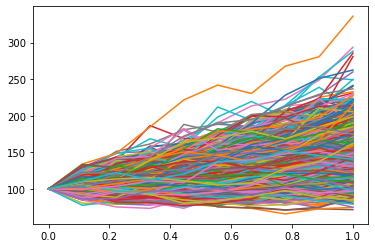

European Call price: 24.37


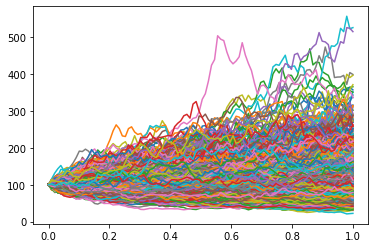

European Call price: 21.21


In [7]:
import matplotlib.pyplot as plt
from Lagrange import LagrangePoly
from numpy import *
from scipy.stats import norm
from BSCallAnalytical import BSCallAnalytical
from SCMC import  SCMC
from SCMCCallMonteCarlo import SCMCCallMonteCarlo
from EulerCallMonteCarlo import EulerCallMonteCarlo

Analytical pricing of European Call Option, to be used as benchmark

In [8]:
callOption = BSCallAnalytical(100, 50, 1, 0.5, 0.2)
callOption.price()

69.67346701649471

ALGO 1: SCMC Method Paper page 4

Formulae to generate collocation points

 $\hat {y}(\tau_{i}) = F^{-1}_{Y(\tau_{i})}(F_{X}(x_{j}))$
 


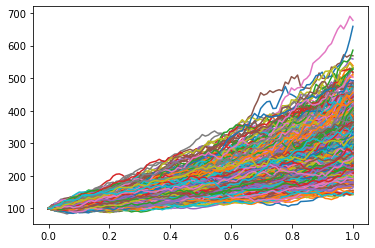

149.88288560944667

In [10]:
SCMCCallMonteCarlo(100, 120, 1, 0.2, 0.5, 100,1000).price()

In [11]:
EulerCallMonteCarlo(100,120,1,0.2,0.5,100,1000)